# SEGUNDO AVANCE DEL PÍA

**Equipo:** 8

**Grupo:** 002 (Miercoles 7-10 pm)

**Integrantes:**

* 1872932 Huerta Torres Daniela Paola
* 1855188 Aguilar Ortiz Verónica Vanessa
* 1751125 Rodríguez Chaires Fernando Jahir
* 1857876 Jalomo Hernández Miguel Ángel

### Base de datos 

* **Nombre:** Conjunto de datos de predicción de accidentes cerebrovasculares
* **URL:**  https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/tasks?taskId=3281

### Descripción de datos
* **Id:** Identificación única.
* **Género:** El tipo de dato tipo texto. Masculino, Femenino u otro.
* **Edad:** Dato tipo entero. Edad del paciente.
* **Característica binaria de hipertensión:** Tipo entero. Si el paciente cuenta con hipertensión = 1, si no cuenta con hipertensión = 0.
* **Característica binaria de enfermedad cardíaca:** Tipo entero. Si el paciente cuenta con una enfermedad cardíaca = 1, si el paciente no cuenta con una enfermedad cardíaca = 0.
* **¿El paciente ha estado casado alguna vez?:** Dato tipo texto. Estatus marital (cierto u falso).
* **Tipo de trabajo del paciente:** Dato tipo texto. Tipo de empleo (Privado, Cuenta propia, etc.)
* **Tipo de residencia del paciente:** Dato tipo texto. Rural o Urbano.
* **Nivel medio de glucosa en sangre:** Dato tipo flotante. Nivel medio de glucosa en sangre de una persona.
* **Índice de masa corporal:** Dato tipo flotante. Índice de masa corporal de una persona.
* **Estatud de fumadores:** Dato tipo texto. "anteriormente fumado", "nunca fumado", "fuma"o "Desconocido" *
* **Accidente cerebrovascular:** Dato tipo entero. Se considera 1 si el paciente tuvo un accidente cerebrovascular o 0 si no

### Justificación de datos
• **¿Por qué trabajar con ellos?**
Los accidentes cerebrovasculares son muy importantes, y es oportuno saber anticipadamente si estos se pueden prevenir, por lo que, en base a la investigación del tema y los datos proporcionados por la base de datos, con este tipo de información nos podemos enfocar en que tipo de personas en base a la edad, genero y el tipo de residencia es la que es mas predecible que sufra una lesión cerebrovascular y así anticiparnos a la causa.

• **¿Qué beneficio obtenemos al trabajar con estos datos?**
Se puede apreciar que tipo de pacientes son los que comúnmente tienden a tener un problema cerebrovascular en base a sectores como lo son la edad, el genero, tipo de residencia y así como saber si el que tenga otras enfermedades tenga que ver con la causa del problema cerebrovascular, o descartar datos que nos lleven a la causa misma.

### Objetivo final
Realizar una predicción de los accidentes cardiovasculares en cualquier momento de la vida de una persona.

### Limpieza de datos
Importamos nuestra base de datos la cual lleva por nombre "healthcare-dataset-stroke-data.csv" cuyos datos sin manipulación son los siguientes:

In [72]:
import pandas as pd
import numpy as np
import json
df = pd.read_csv("C:/Users/Daniela/Desktop/Daniela/Facultad/7mo sem/Mineria/AVANCE PIA/BASE 2/healthcare-dataset-stroke-data.csv")
print("La base sin manipulación es:")
df

La base sin manipulación es:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Para el enfoque que le queremos dar a nuestra investigación, decidimos dejar las columnas que nosotros pensamos que mas influyen al diagnosticar un problema cerebrovascular, como lo es la edad, la hipertensión, si esta enfermo del corazón, su nivel de glucosa, IMC, el estatus de fumador, y si ya ha padecido de un ataque cerebovascular. Tambien se nos hizo interesante dejar el sexo, para ver a que género ataca más esta enfermedad.

In [74]:
df.rename(columns={'id':'ID','gender':'Sexo','age':'Edad','hypertension':'Hipertensión','heart_disease':'Enfermo del corazon','avg_glucose_level':'Nivel de glucosa','bmi':'IMC','smoking_status':"Estado respecto a si fuma"},inplace=True)
#Modifica los nombres de las columnas, con ayuda de: https://www.analyticslane.com/2019/05/06/como-cambiar-el-nombre-de-las-columnas-en-pandas/
cf=df.drop(['ever_married','work_type','Residence_type'],axis=1) #Guarda la base que necesitamos en otra variable
#Con ayuda de: https://www.analyticslane.com/2019/03/25/como-eliminar-columnas-y-filas-en-un-dataframe-pandas/
cf

,ID,Sexo,Edad,Hipertensión,Enfermo del corazon,Nivel de glucosa,IMC,Estado respecto a si fuma,stroke
0,9046,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,166.29,25.6,formerly smoked,0


Nuestra base de datos cuenta con datos nulos, en la colmna de IMC:

In [75]:
cf.isnull().sum()

ID                             0
Sexo                           0
Edad                           0
Hipertensión                   0
Enfermo del corazon            0
Nivel de glucosa               0
IMC                          201
Estado respecto a si fuma      0
stroke                         0
dtype: int64

Para no perder ningun registro, y poder seguir trabajando con ellos, rellenamos los datos faltantes con el promedio de IMC.

In [76]:
import numpy as np
average_column_name = cf['IMC'].astype(float).mean(axis = 0)
cf['IMC'].replace(np.nan, average_column_name, inplace = True)
cf.isnull().sum()

ID                           0
Sexo                         0
Edad                         0
Hipertensión                 0
Enfermo del corazon          0
Nivel de glucosa             0
IMC                          0
Estado respecto a si fuma    0
stroke                       0
dtype: int64

Creando la nueva base de datos con los datos que necesitamos únicamente, la guardamos bajo el nombre NuevaBaseCerebrovascular.csv:

In [77]:
cf.to_csv("NuevaBaseCerebrovascular.csv",index=False)
#Lugar donde obtuvimos la ayuda: https://aprendeia.com/limpieza-y-procesamiento-de-datos-con-codigo-en-python/

### Estadística básica

Nos interesa realizar un estudio de la muestra que tenemos en nuesrtra base de datos, ver si estar ante ciertas circustancias aumentan el peligro de padecer un ataque cerebrovascular. 

A continuación, buscamos entre que edades se muestran nuestros datos y la distribución entre los géneros.

In [78]:
#Calculo de intervalo de edades
mj=min(cf['Edad'])
print("La persona más joven de edad tiene",mj,"años")
mv=max(cf['Edad'])
print("La persona más grande de edad tiene",mv,"años")
mn=sum(cf['Edad']<18)
print("Tomando como 18 años la mayoría de edad, en la base hay",mn,"menores de edad")

#Distribución de generos
print("En respecto al genero tenemos: ")
nh=sum(cf['Sexo']=='Male')
nm=sum(cf['Sexo']=='Female')
nu=sum(cf['Sexo']=='Other')
print("El número de hombres en la base de datos es:",nh)
print("El número de mujeres en la base de datos es:",nm)
print("El número de personas con algún otro sexo en la base de datos es:",nu)

La persona más joven de edad tiene 0.08 años
La persona más grande de edad tiene 82.0 años
Tomando como 18 años la mayoría de edad, en la base hay 856 menores de edad
En respecto al genero tenemos: 
El número de hombres en la base de datos es: 2115
El número de mujeres en la base de datos es: 2994
El número de personas con algún otro sexo en la base de datos es: 1


Tambien se quizo realizar un analisis respecto a su estatus en respecto a la gente fumadora.

In [105]:
asi=sum(cf['Estado respecto a si fuma']=='formerly smoked')
si=sum(cf['Estado respecto a si fuma']=='smokes')
n=sum(cf['Estado respecto a si fuma']=='never smoked')
uk=sum(cf['Estado respecto a si fuma']=='Unknown')
print("El número de personas que antes fumaban en la base de datos es:",asi)
print("El número de personas que fuman en la base de datos es:",si)
print("El número de personas que nunca han fumado en la base de datos es:",n)
print("El número de personas del que no se sabe si fuman en la base de datos es:",uk)

El número de personas que antes fumaban en la base de datos es: 885
El número de personas que fuman en la base de datos es: 789
El número de personas que nunca han fumado en la base de datos es: 1892
El número de personas del que no se sabe si fuman en la base de datos es: 1544


Y con respecto a otros padecimientos como la hipertensión y si padece enfermedades del corazón:

In [80]:
sh=cf['Hipertensión'].sum()
sec=cf['Enfermo del corazon'].sum()
psh=(sh/len(cf))*100
psec=(sec/len(cf))*100
print("En la base hay",sh,"pacientes con hipertensión, lo cual es el",psh,"% de pacientes")
print("En la base hay",sec,"pacientes que padecen alguna enfermedad del corazón, lo cual es el",psec,"% de pacientes")

En la base hay 498 pacientes con hipertensión, lo cual es el 9.74559686888454 % de pacientes
En la base hay 276 pacientes que padecen alguna enfermedad del corazón, lo cual es el 5.401174168297456 % de pacientes


Eh igual tratamos con la glucosa y verificar con que pordentaje de nuestra muestra excedia por arriba del promedio:

In [92]:
mg=cf['Nivel de glucosa'].mean()
ec=sum(cf['Nivel de glucosa']>mg)
ex=sum(cf['Nivel de glucosa']>140)
print("La media del nivel de glucosa es",mg," mg/dl y",ec,"pacientes de la base de datos se encuentra por encima de este número.")
print("Los pacientes con glucosa superior a 140 mg/dl son ",ex," lo cual significa que padecen de prediabetes.") 
print("Esto se suele conocer como tolerancia alterada a la glucosa.")

La media del nivel de glucosa es 106.14767710371804  mg/dl y 1644 pacientes de la base de datos se encuentra por encima de este número.
Los pacientes con glucosa superior a 140 mg/dl son  821  lo cual significa que padecen de prediabetes.
Esto se suele conocer como tolerancia alterada a la glucosa.


Lo mismo se puede conocer respecto al índice de masa corporal (IMC), teniendo en cuenta lo siguiente respecto al IMC:

* IMC con valor menor a 25 se considera como un peso normal
* IMC con valor entre 25 y 29.99 se considera como sobrepeso
* IMC con valor entre 30 y 34.99 se considera como obesidad tipo 1
* IMC con valor entre 35 y 39.99 se considera como obesidad tipo 2
* Un IMC mayor a 40, se considera una obesidad del tipo 3

Conociendo esto, podemos visualizar cuantos pacientes de la base de datos se encuentran en cada rango:

In [93]:
pn=sum(cf['IMC']<25)
sb=cf[(cf['IMC']>=25) & (cf['IMC']<30)]
ob1=cf[(cf['IMC']>=30) & (cf['IMC']<35)]
ob2=cf[(cf['IMC']>=35) & (cf['IMC']<40)]
ob3=sum(cf['IMC']>=40)
print("El total de pacientes con peso normal es de",pn)
print("El total de pacientes con sobrepeso es de",sb['IMC'].count())
print("El total de pacientes con obesidad tipo 1 es de",ob1['IMC'].count())
print("El total de pacientes con obesidad tipo 2 es de",ob2['IMC'].count())
print("El total de pacientes con obesidad tipo 3 es de",ob3)

El total de pacientes con peso normal es de 1580
El total de pacientes con sobrepeso es de 1610
El total de pacientes con obesidad tipo 1 es de 1000
El total de pacientes con obesidad tipo 2 es de 506
El total de pacientes con obesidad tipo 3 es de 414


Como podemos ver, entre más peso, más nivel de glucosa se encontró.

Después mostramos la correlación entre las variables.

In [98]:
cf.corr()

,ID,Edad,Hipertensión,Enfermo del corazon,Nivel de glucosa,IMC,stroke
ID,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
Edad,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
Hipertensión,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
Enfermo del corazon,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
Nivel de glucosa,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
IMC,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


Ahora observaremos en un mapa de color la correlación entre las variables.

<AxesSubplot:>

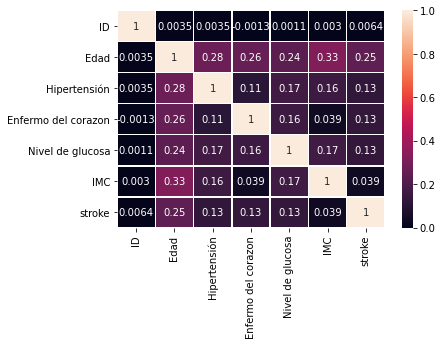

In [99]:
import seaborn as sns
sns.heatmap(cf.corr(),annot= True,linewidths=0.5)

Con esto podemos ver la relación que hay entre variables y que la correlación con la que nos encontramos en general no es tan alta, las variables con más relación son las variables edad e IMC, después las valiables edad e hipertensión, siguiendo también las variables edad y si esta enfermo del corazón.

Ahora para poder apreciar mejor la información, iniciaremos realizando el analísis desde la representación gráfica.

### Parte gráfica

Abordamos interesantes puntos en la parte descriptiva por lo que ahora es de interés verlas gráficamente. Comenzando por las edades de los pacientes:

Text(0.5, 1.0, 'Distribuciones de la edad de pacientes')

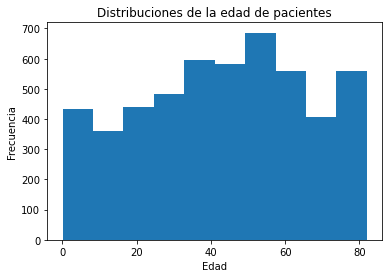

In [102]:
import matplotlib.pyplot as plt
cf['Edad'].plot.hist()
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribuciones de la edad de pacientes")

Cómo se visualiza en nuestra gráfica se puede apreciar que normalmente la frecuencia se mantiene alta (alrededor de 600) a partir de la 4 década, a excepción de los 70´s, ya que se nota que desciende la frecuencia, pero esta vuelve a subir notoriamente en los 80´s. Tenemos que nuestra mayor frecuencia se encuentra entre las edades de 40 y 60, teniendo un alto número en su promedio. Si bien, de igual manera se puede observar que nuestra frecuencia se mantiene alta.


Ahora visualizaremos la distrubución de los datos que hay entre los sexos:

C:\Users\Daniela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sexo', ylabel='count'>

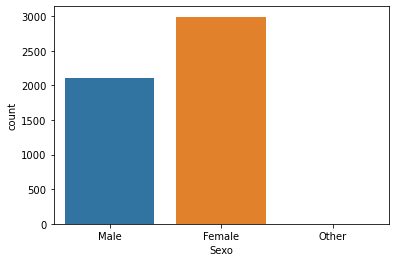

In [103]:
import seaborn as sns
sns.countplot(cf['Sexo'])

Observando nuestra gráfico podemos apreciar que el sexo femenino sobrepasa al masculino por ½ de parte del masculino, a la enfermedad se le da más en personas de sexo femenino abarcando casi el 60% de los datos. 
 
Y también podemos visualizar los que son fumadores o no, si lo dejaron o si no se sabe:

C:\Users\Daniela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Estado respecto a si fuma', ylabel='count'>

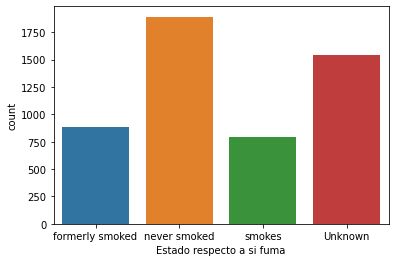

In [104]:
sns.countplot(cf['Estado respecto a si fuma'])

Respecto a la información proporcionada en la gráfica se puede apreciar que el tabaco no es un factor importante en la enfermedad, ya que la categoria que mas destaca es de las personas no consume tabaco que son alrededor del 37% de los datos, incluso juntando la gente que fuma (verde) con los que normalmente lo hacen (azul) no sobrepasa a la gente que no lo consume (naranja). Por lo que descartaríamos el problema del tabaco como posible causante de la enfermedad, aun y habiendo un número grande de personas que desconocemos su estado respecto al tabaco.

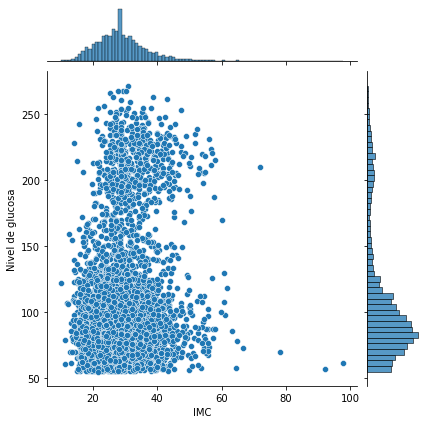

In [107]:
sns.jointplot(x='IMC', y='Nivel de glucosa',data=cf)

Gráficamente se demuestra que no necesariamente el nivel de glucosa depende del IMC, además de que se pueden observar algunos datos atípicos. 

<AxesSubplot:xlabel='Nivel de glucosa', ylabel='Density'>

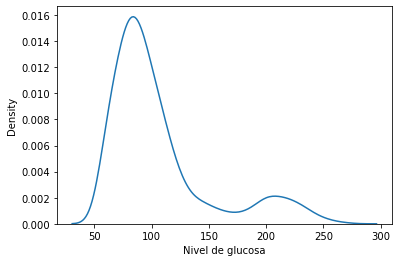

In [108]:
sns.kdeplot(cf['Nivel de glucosa'])

Respecto a la gráfica anterior se apreció que el nivel de glucosa no depende del IMC, sin embargo, no ocurre lo mismo con la Densidad, se puede apreciar que a mayor densidad menor Nivel de Glucosa.

Text(0.5, 1.0, 'Distribuciones de la edad de personas que padecen Hipertensión')

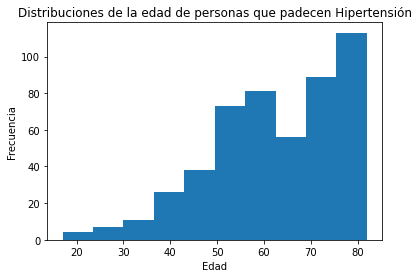

In [109]:
af=cf[cf['Hipertensión']==1]
af['Edad'].plot.hist()
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribuciones de la edad de personas que padecen Hipertensión")

En cuanto a las personas que cuentan con Hipertensión, podemos apreciar que a partir de los 10 años la frecuencia va en aumento, hasta llegar a la edad de 60 años donde recae la frecuencia, pero lamentablemente esta vuelve a subir a partir de la séptima década. Y como podemos observar la hipertensión se da más alrededor de los 50 años en delante.

Text(0.5, 1.0, 'Distribuciones de la edad de personas que padecen enfermedades del corazón')

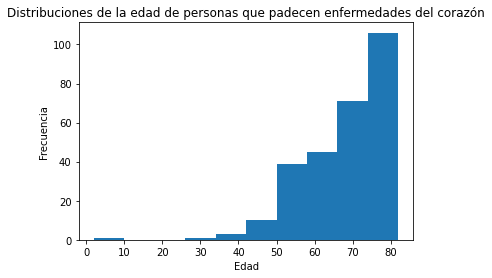

In [110]:
bf=cf[cf['Enfermo del corazon']==1]
bf['Edad'].plot.hist()
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribuciones de la edad de personas que padecen enfermedades del corazón")

Al contrario, y como sucedió con las personas que padecen de Hipertensión que casi desde que nacen sufren de ese problema, con las personas que sufren enfermedades del corazón es distinto, la persona lleva su vida cotidiana normal sin ninguna enfermedad, pero a largo plazo podría verse afectada dependiendo de la vida que lleve, ya que casi llegando a los 50 años comienzan los problemas del corazón. Como se puede observar, estas enfermedades se ven más de los 70 años en delante.